### Student Name: Michael Corrado

In [1]:
#TODO: import the modules
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

### Step 1 – Explain any overfitting or underfitting in the previous model

The accuracy on the previous decision tree was 61.7%. It seems like the model is underfitting and the accuracy for the model was extremely low. I hope after setting these parameters we see an increase in accuracy and no overfitting occurs 

### Step 2 – Load the data and extract the features

In [2]:
#TODO: load the data and extract the features: 'VendorID', RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip'
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']
import pandas as pd
file_path =("/Users/Michael/Python Anaconda/Machine_Learning_SHU/Decisiontree_4_part2/trip_data.csv") 
df = pd.read_csv(file_path, usecols=features)

X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

In [3]:
df.head()

VendorID  RatecodeID  PULocationID  DOLocationID  passenger_count  \
0       2.0         1.0            24            41              1.0   
1       2.0         1.0           112           232              1.0   
2       2.0         1.0            97           227              5.0   
3       2.0         1.0           223           129              1.0   
4       2.0         1.0           223             7              1.0   

   trip_distance  fare_amount  extra  mta_tax  tolls_amount  \
0           0.67          5.5    0.5      0.5           0.0   
1           2.64         10.0    0.5      0.5           0.0   
2           3.85         18.0    0.5      0.5           0.0   
3           2.97         11.5    0.5      0.5           0.0   
4           1.60          8.0    0.5      0.5           0.0   

   improvement_surcharge  total_amount  trip_type  congestion_surcharge   tip  
0                    0.3          8.84        1.0                  0.00  good  
1                    0.3         16.86        1.0                  2.75   low  
2                    0.3         22.20        1.0                  0.00   low  
3                    0.3         13.80        1.0                  0.00   low  
4                    0.3         11.62        1.0                  0.00  good

In [4]:
df.describe().T

count        mean        std   min    25%     50%  \
VendorID               171941.0    1.842190   0.364564  1.00   2.00    2.00   
RatecodeID             171941.0    1.045731   0.424170  1.00   1.00    1.00   
PULocationID           171941.0  103.152558  68.253994  1.00  52.00   75.00   
DOLocationID           171941.0  133.958707  77.035977  1.00  66.00  137.00   
passenger_count        171941.0    1.306262   0.965556  0.00   1.00    1.00   
trip_distance          171941.0    2.359276   1.759422  0.01   1.08    1.80   
fare_amount            171941.0   11.121357   6.393361  0.01   6.50    9.50   
extra                  171941.0    0.448590   0.632314  0.00   0.00    0.50   
mta_tax                171941.0    0.494548   0.052529  0.00   0.50    0.50   
tolls_amount           171941.0    0.077659   0.690598  0.00   0.00    0.00   
improvement_surcharge  171941.0    0.298234   0.022948  0.00   0.30    0.30   
total_amount           171941.0   15.148219   8.329871  0.01   9.36   12.88   
trip_type              171941.0    1.010719   0.102976  1.00   1.00    1.00   
congestion_surcharge   171941.0    0.600055   1.135714  0.00   0.00    0.00   

                          75%     max  
VendorID                 2.00    2.00  
RatecodeID               1.00    5.00  
PULocationID           145.00  265.00  
DOLocationID           203.00  265.00  
passenger_count          1.00    9.00  
trip_distance            3.10    8.43  
fare_amount             14.00  180.00  
extra                    0.50    4.50  
mta_tax                  0.50    3.55  
tolls_amount             0.00   22.74  
improvement_surcharge    0.30    0.30  
total_amount            18.66  452.80  
trip_type                1.00    2.00  
congestion_surcharge     0.00    2.75

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171941 entries, 0 to 171940
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               171941 non-null  float64
 1   RatecodeID             171941 non-null  float64
 2   PULocationID           171941 non-null  int64  
 3   DOLocationID           171941 non-null  int64  
 4   passenger_count        171941 non-null  float64
 5   trip_distance          171941 non-null  float64
 6   fare_amount            171941 non-null  float64
 7   extra                  171941 non-null  float64
 8   mta_tax                171941 non-null  float64
 9   tolls_amount           171941 non-null  float64
 10  improvement_surcharge  171941 non-null  float64
 11  total_amount           171941 non-null  float64
 12  trip_type              171941 non-null  float64
 13  congestion_surcharge   171941 non-null  float64
 14  tip                    171941 non-nu

### Step 3 – Split the data
The test set should comprise 30% of the dataset. Ensure the data is randomized and that stratified samples are obtained.

In [7]:
#TODO: Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1,stratify = y ) #TODO: fill in the required options

### Step 4 – Instantiate the Decision Tree Classifer

In [8]:
dt_estimator = DecisionTreeClassifier()

### Step 5 – Create a dictionary that contains the decision tree parameters

In [11]:
params = {
    'criterion': ['gini', 'entropy'], #a list of options for criterion.
    'max_depth':[5,7,10], #TODO: provide a list of three numbers between 5 and 15 inclusive.
    'min_samples_split':[120,150,170,200,230,260,290,320,350,380] #TODO: provide a list of ten numbers between 100 and 500.
}

### Step 6 – Perform the Random search
Provide the dictionary from step 5 above and use the decison tree from step 4 as the estimator.

In [14]:
rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose=3, #display messages while training
                                 n_iter= 55,#TODO: set n_iter to a value between 50 and 100
                                 cv=10) #TODO: set the number of folds to 10 for the cross validation


estimator = rand_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

Fitting 10 folds for each of 55 candidates, totalling 550 fits
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.662 total time=   0.5s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.661 total time=   0.4s
[CV 3/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.670 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.660 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.661 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.661 total time=   0.3s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.662 total time=   0.3s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.659 total time=   0.3s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_split=150;, score=0.661 total time=   0.4s
[CV 10/10] END criterion=ent

[CV 3/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.826 total time=   0.6s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.817 total time=   0.6s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.824 total time=   0.6s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.822 total time=   0.6s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.819 total time=   0.5s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.824 total time=   0.6s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.818 total time=   0.6s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_split=150;, score=0.828 total time=   0.6s
[CV 1/10] END criterion=entropy, max_depth=5, min_samples_split=120;, score=0.662 total time=   0.4s
[CV 2/10] END criterion=entropy, max_depth=5, min_samples_split=120;, score=0.661 total time=   0.4s
[CV 3

[CV 6/10] END criterion=entropy, max_depth=5, min_samples_split=170;, score=0.661 total time=   0.4s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_split=170;, score=0.662 total time=   0.4s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_split=170;, score=0.659 total time=   0.4s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_split=170;, score=0.661 total time=   0.5s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_split=170;, score=0.662 total time=   0.4s
[CV 1/10] END criterion=gini, max_depth=5, min_samples_split=150;, score=0.663 total time=   0.4s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_split=150;, score=0.662 total time=   0.6s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_split=150;, score=0.670 total time=   0.4s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_split=150;, score=0.663 total time=   0.4s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_split=150;, score=0.659 total time=   0.4s
[CV 

[CV 8/10] END criterion=gini, max_depth=10, min_samples_split=380;, score=0.806 total time=   0.6s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_split=380;, score=0.797 total time=   0.6s
[CV 10/10] END criterion=gini, max_depth=10, min_samples_split=380;, score=0.805 total time=   0.6s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_split=150;, score=0.825 total time=   0.6s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_split=150;, score=0.830 total time=   0.6s
[CV 3/10] END criterion=entropy, max_depth=10, min_samples_split=150;, score=0.831 total time=   0.5s
[CV 4/10] END criterion=entropy, max_depth=10, min_samples_split=150;, score=0.825 total time=   0.5s
[CV 5/10] END criterion=entropy, max_depth=10, min_samples_split=150;, score=0.829 total time=   0.5s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_split=150;, score=0.828 total time=   0.5s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_split=150;, score=0.829 total t

[CV 10/10] END criterion=entropy, max_depth=7, min_samples_split=150;, score=0.711 total time=   0.4s
[CV 1/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.807 total time=   0.5s
[CV 2/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.817 total time=   0.5s
[CV 3/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.819 total time=   0.5s
[CV 4/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.809 total time=   0.5s
[CV 5/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.816 total time=   0.5s
[CV 6/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.815 total time=   0.5s
[CV 7/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.810 total time=   0.5s
[CV 8/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.816 total time=   0.5s
[CV 9/10] END criterion=gini, max_depth=10, min_samples_split=230;, score=0.808 total time=   0.5s
[CV 10/

[CV 3/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.670 total time=   0.3s
[CV 4/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.660 total time=   0.3s
[CV 5/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.661 total time=   0.3s
[CV 6/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.661 total time=   0.3s
[CV 7/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.662 total time=   0.3s
[CV 8/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.659 total time=   0.3s
[CV 9/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.661 total time=   0.3s
[CV 10/10] END criterion=entropy, max_depth=5, min_samples_split=350;, score=0.662 total time=   0.3s
[CV 1/10] END criterion=entropy, max_depth=10, min_samples_split=170;, score=0.822 total time=   0.5s
[CV 2/10] END criterion=entropy, max_depth=10, min_samples_split=170;, score=0.828 total 

[CV 5/10] END criterion=entropy, max_depth=10, min_samples_split=200;, score=0.824 total time=   0.5s
[CV 6/10] END criterion=entropy, max_depth=10, min_samples_split=200;, score=0.822 total time=   0.5s
[CV 7/10] END criterion=entropy, max_depth=10, min_samples_split=200;, score=0.824 total time=   0.5s
[CV 8/10] END criterion=entropy, max_depth=10, min_samples_split=200;, score=0.821 total time=   0.6s
[CV 9/10] END criterion=entropy, max_depth=10, min_samples_split=200;, score=0.820 total time=   0.6s
[CV 10/10] END criterion=entropy, max_depth=10, min_samples_split=200;, score=0.824 total time=   0.6s
[CV 1/10] END criterion=gini, max_depth=7, min_samples_split=230;, score=0.725 total time=   0.4s
[CV 2/10] END criterion=gini, max_depth=7, min_samples_split=230;, score=0.731 total time=   0.6s
[CV 3/10] END criterion=gini, max_depth=7, min_samples_split=230;, score=0.736 total time=   0.5s
[CV 4/10] END criterion=gini, max_depth=7, min_samples_split=230;, score=0.729 total time=   

### Step 7 – Train the decision tree

In [9]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion='entropy' , #TODO: use the value from the random search results.
                                       max_depth=10 ,#TODO: use the value from the random search results.
                                       min_samples_split= 120 #TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

### Step 8 – Evaluate the accuracy

In [11]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333559506038811


### Step 9 – Visualize the decision tree

In [12]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [13]:
#TODO: Display the decision tree
dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df.columns[0:14],class_names=dt_classifier.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.721121 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.721121 to fit



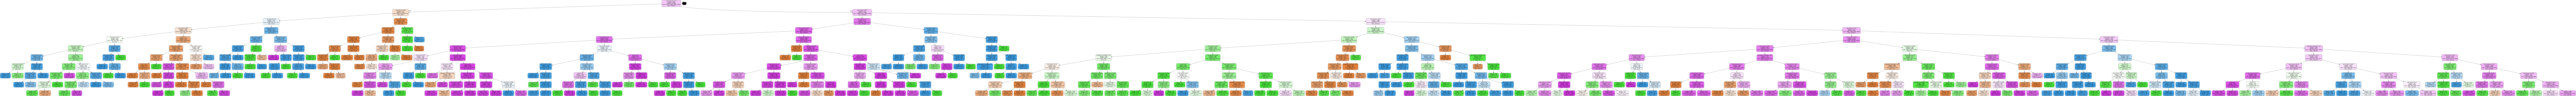

In [14]:
graph.write_png('DecisionTreePt1')
Image(graph.create_png())

### Step 10 – Summarize the results using one paragraph (2-5 sentences)

The results are extremely promising,the accuracy of the model increased by over 20%. It is a bit difficult to read the decision tree due to the size of the tree and the amount of branches it has. I would like to prune the tree however, accuracy could be lost. The tree's first branch splits with the total amount of the bill. I believe that this has the most influence on the tip the driver receives. 
